In [81]:
import numpy as np
import random
import time
import sys
from pyskiplist import SkipList

In [82]:
sys.setrecursionlimit(1000000)
sys.getrecursionlimit()

1000000

In [83]:
searchList=[]
for i in range(1,10**5+1):
    searchList.append(random.randint(1,10**7))

In [84]:
len(searchList)

100000

# Treap

In [85]:
import random

class TreapNode(object):
    def __init__(self, key, data):
        self.key = key
        self.ran = random.random()
        self.size = 1
        self.cnt = 1
        self.data = data
        self.left = None
        self.right = None

    def left_rotate(self):
        a = self
        b = a.right
        a.right = b.left
        b.left = a
        a = b
        b = a.left
        b.size = b.left_size() + b.right_size() + b.cnt
        a.size = a.left_size() + a.right_size() + a.cnt
        return a

    def right_rotate(self):
        a = self
        b = a.left
        a.left = b.right
        b.right = a
        a = b
        b = a.right
        b.size = b.left_size() + b.right_size() + b.cnt
        a.size = a.left_size() + a.right_size() + a.cnt
        return a

    def left_size(self):
        return 0 if self.left is None else self.left.size

    def right_size(self):
        return 0 if self.right is None else self.right.size
    
    def __repr__(self):
        return '<node key:%s ran:%f size:%d left:%s right:%s>' % (str(self.key), self.ran, self.size, str(self.left), str(self.right))


class Treap(object):
    def __init__(self):
        self.root = None

    def _insert(self, node, key, data=None):
        if node is None:
            node = TreapNode(key, data)
            return node
        node.size += 1
        if key < node.key:
            node.left = self._insert(node.left, key, data)
            if node.left.ran < node.ran:
                node = node.right_rotate()
        elif key >= node.key:
            node.right = self._insert(node.right, key, data)
            if node.right.ran < node.ran:
                node = node.left_rotate()
        #else:
        #    node.cnt += 1
        return node

    def insert(self, key, data=None):
        self.root = self._insert(self.root, key, data)
    
    def _find(self, node, key):
        if node == None:
            return None
        if node.key == key:
            return node
        if key < node.key:
            return self._find(node.left, key)
        else:
            return self._find(node.right, key)

    def find(self, key):
        return self._find(self.root, key)

    def _delete(self, node, key):
        if node is None:
            return False
        if node.key == key:
            if node.left is None and node.right is None:
                return None
            elif node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            else:
                if node.left.ran < node.right.ran:
                    node = node.right_rotate()
                    node.right = self._delete(node.right, key)
                else:
                    node = node.left_rotate()
                    node.left = self._delete(node.left, key)
        elif key < node.key:
            node.left = self._delete(node.left, key)
        else:
            node.right = self._delete(node.right, key)
        node.size = node.left_size() + node.right_size() + node.cnt
        return node

    def delete(self, key):
        if self.find(key) is None: return False
        self.root = self._delete(self.root, key)
        return True

    def _find_kth(self, node, k):
        if node is None: return None
        if k <= node.left_size():
            return self._find_kth(node.left, k)
        if k > node.left_size() + node.cnt:
            return self._find_kth(node.right, k - node.left_size() - node.cnt)
        return node

    def find_kth(self, k):
        if k <=0 or k > self.size():
            return None
        return self._find_kth(self.root, k)

    def size(self):
        return 0 if self.root is None else self.root.size
    
    def median(self):
        s = self.size()
        if s == 0: return 0
        result = 0
        if s % 2 == 1:
            result = self.find_kth(s / 2 + 1).key
        else:
            result = (self.find_kth(s / 2).key + self.find_kth(s / 2 + 1).key) / 2.0
        if result == int(result): result = int(result)
        return result

    def _traverse(self, node):
        if node == None: return
        self._traverse(node.left)
        print(node.key)
        self._traverse(node.right)

    def traverse(self):
        self._traverse(self.root)
    
    def __repr__(self):
        return str(self.root)

Treap source code:https://gist.github.com/irachex/3922705

In [86]:
t = Treap()

In [87]:
tPartDuration = []
for i in range(0,10**4):
    tStart = time.clock()
    for j in range(1000*i+1,1000*(i+1)+1):        
        t.insert(random.randint(1,10**7))
    tEnd = time.clock()
    tDuration = tEnd - tStart
    tPartDuration.append(tDuration)

In [88]:
tSStart = time.clock()
for i in range(0,10**5):
    t.find(searchList[i])
tSEnd = time.clock()
tSDuration = tSEnd - tSStart
tSDuration

2.334514800000761

# Skiplist

In [90]:
s = SkipList()

In [91]:
sPartDuration = []
for i in range(0,10**4):
    sStart = time.clock()
    for j in range(1000*i+1,1000*(i+1)+1):        
        s.insert(j,random.randint(1,10**7))
    sEnd = time.clock()
    sDuration = sEnd - sStart
    sPartDuration.append(sDuration)   

In [92]:
len(sPartDuration)

10000

In [94]:
sSStart = time.clock()
for i in range(0,10**5):
    s.search(searchList[i])
sSEnd = time.clock()
sSDuration = sSEnd - sSStart
sSDuration

1.8920257999998285

# Red black tree

In [96]:
class rbnode(object):
    """
    A node in a red black tree. See Cormen, Leiserson, Rivest, Stein 2nd edition pg 273.
    """
    
    def __init__(self, key):
        "Construct."
        self._key = key
        self._red = False
        self._left = None
        self._right = None
        self._p = None
    
    key = property(fget=lambda self: self._key, doc="The node's key")
    red = property(fget=lambda self: self._red, doc="Is the node red?")
    left = property(fget=lambda self: self._left, doc="The node's left child")
    right = property(fget=lambda self: self._right, doc="The node's right child")
    p = property(fget=lambda self: self._p, doc="The node's parent")
    
    def __str__(self):
        "String representation."
        return str(self.key)
    

    def __repr__(self):
        "String representation."
        return str(self.key)

class rbtree(object):
    """
    A red black tree. See Cormen, Leiserson, Rivest, Stein 2nd edition pg 273.
    """
    
    
    def __init__(self, create_node=rbnode):
        "Construct."
        
        self._nil = create_node(key=None)
        "Our nil node, used for all leaves."
        
        self._root = self.nil
        "The root of the tree."
        
        self._create_node = create_node
        "A callable that creates a node."


    root = property(fget=lambda self: self._root, doc="The tree's root node")
    nil = property(fget=lambda self: self._nil, doc="The tree's nil node")
    
    
    def search(self, key, x=None):
        """
        Search the subtree rooted at x (or the root if not given) iteratively for the key.
        
        @return: self.nil if it cannot find it.
        """
        if None == x:
            x = self.root
        while x != self.nil and key != x.key:
            if key < x.key:
                x = x.left
            else:
                x = x.right
        return x

    
    def minimum(self, x=None):
        """
        @return: The minimum value in the subtree rooted at x.
        """
        if None == x:
            x = self.root
        while x.left != self.nil:
            x = x.left
        return x

    
    def maximum(self, x=None):
        """
        @return: The maximum value in the subtree rooted at x.
        """
        if None == x:
            x = self.root
        while x.right != self.nil:
            x = x.right
        return x

    
    def insert_key(self, key):
        "Insert the key into the tree."
        self.insert_node(self._create_node(key=key))
    
    
    def insert_node(self, z):
        "Insert node z into the tree."
        y = self.nil
        x = self.root
        while x != self.nil:
            y = x
            if z.key < x.key:
                x = x.left
            else:
                x = x.right
        z._p = y
        if y == self.nil:
            self._root = z
        elif z.key < y.key:
            y._left = z
        else:
            y._right = z
        z._left = self.nil
        z._right = self.nil
        z._red = True
        self._insert_fixup(z)
        
        
    def _insert_fixup(self, z):
        "Restore red-black properties after insert."
        while z.p.red:
            if z.p == z.p.p.left:
                y = z.p.p.right
                if y.red:
                    z.p._red = False
                    y._red = False
                    z.p.p._red = True
                    z = z.p.p
                else:
                    if z == z.p.right:
                        z = z.p
                        self._left_rotate(z)
                    z.p._red = False
                    z.p.p._red = True
                    self._right_rotate(z.p.p)
            else:
                y = z.p.p.left
                if y.red:
                    z.p._red = False
                    y._red = False
                    z.p.p._red = True
                    z = z.p.p
                else:
                    if z == z.p.left:
                        z = z.p
                        self._right_rotate(z)
                    z.p._red = False
                    z.p.p._red = True
                    self._left_rotate(z.p.p)
        self.root._red = False

    
    def _left_rotate(self, x):
        "Left rotate x."
        y = x.right
        x._right = y.left
        if y.left != self.nil:
            y.left._p = x
        y._p = x.p
        if x.p == self.nil:
            self._root = y
        elif x == x.p.left:
            x.p._left = y
        else:
            x.p._right = y
        y._left = x
        x._p = y


    def _right_rotate(self, y):
        "Left rotate y."
        x = y.left
        y._left = x.right
        if x.right != self.nil:
            x.right._p = y
        x._p = y.p
        if y.p == self.nil:
            self._root = x
        elif y == y.p.right:
            y.p._right = x
        else:
            y.p._left = x
        x._right = y
        y._p = x


    def check_invariants(self):
        "@return: True iff satisfies all criteria to be red-black tree."
        
        def is_red_black_node(node):
            "@return: num_black"
            # check has _left and _right or neither
            if (node.left and not node.right) or (node.right and not node.left):
                return 0, False

            # check leaves are black
            if not node.left and not node.right and node.red:
                return 0, False

            # if node is red, check children are black
            if node.red and node.left and node.right:
                if node.left.red or node.right.red:
                    return 0, False
                    
            # descend tree and check black counts are balanced
            if node.left and node.right:
                
                # check children's parents are correct
                if self.nil != node.left and node != node.left.p:
                    return 0, False
                if self.nil != node.right and node != node.right.p:
                    return 0, False

                # check children are ok
                left_counts, left_ok = is_red_black_node(node.left)
                if not left_ok:
                    return 0, False
                right_counts, right_ok = is_red_black_node(node.right)
                if not right_ok:
                    return 0, False

                # check children's counts are ok
                if left_counts != right_counts:
                    return 0, False
                return left_counts, True
            else:
                return 0, True
                
        num_black, is_ok = is_red_black_node(self.root)
        return is_ok and not self.root._red
                



def write_tree_as_dot(t, f, show_nil=False):
    "Write the tree in the dot language format to f."
    def node_id(node):
        return 'N%d' % id(node)
    
    def node_color(node):
        if node.red:
            return "red"
        else:
            return "black"
    
    def visit_node(node):
        "Visit a node."
        print(f, "  %s [label=\"%s\", color=\"%s\"];" % (node_id(node), node, node_color(node)))
        if node.left:
            if node.left != t.nil or show_nil:
                visit_node(node.left)
                print(f, "  %s -> %s ;" % (node_id(node), node_id(node.left)))
        if node.right:
            if node.right != t.nil or show_nil:
                visit_node(node.right)
                print(f, "  %s -> %s ;" % (node_id(node), node_id(node.right)))
             
    print(f, "// Created by rbtree.write_dot()")
    print(f, "digraph red_black_tree {")
    visit_node(t.root)
    print(f, "}")




def test_tree(t, keys):
    "Insert keys one by one checking invariants and membership as we go."
    assert t.check_invariants()
    for i, key in enumerate(keys):
        for key2 in keys[:i]:
            assert t.nil != t.search(key2)
        for key2 in keys[i:]:
            assert (t.nil == t.search(key2)) ^ (key2 in keys[:i])
        t.insert_key(key)
        assert t.check_invariants()
    

if '__main__' == __name__:
    import os, sys, numpy.random as R
    def write_tree(t, filename):
        "Write the tree as an SVG file."
        f = open('%s.dot' % filename, 'w')
        write_tree_as_dot(t, f)
        f.close()
        os.system('dot %s.dot -Tsvg -o %s.svg' % (filename, filename))
        
    # test the rbtree
    R.seed(2)
    size=50
    keys = R.randint(-50, 50, size=size)
    t = rbtree()
    test_tree(t, keys)

Red black tree source code:(http://code.activestate.com/recipes/576817-red-black-tree/)

In [97]:
rb = rbtree()

In [98]:
rbPartDuration = []
for i in range(0,10**4):
    rbStart = time.clock()
    for j in range(1000*i+1,1000*(i+1)+1):        
        rb.insert_key(random.randint(1,10**7))
    rbEnd = time.clock()
    rbDuration = rbEnd - rbStart
    rbPartDuration.append(rbDuration)

In [99]:
rbSStart = time.clock()
for i in range(0,10**5):
    rb.search(searchList[i])
rbSEnd = time.clock()
rbSDuration = rbSEnd - rbSStart
rbSDuration

2.293303600003128

In [100]:
tSumDuration = sum(tPartDuration)
sSumDuration = sum(sPartDuration)
rbSumDuration = sum(rbPartDuration)
print(tSumDuration,sSumDuration,rbSumDuration)
print(tSDuration,sSDuration,rbSDuration)

1289.9796471004447 166.69257439958164 530.9217771992408
2.334514800000761 1.8920257999998285 2.293303600003128


In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

In [102]:
insertTime = [tSumDuration,sSumDuration,rbSumDuration]
searchTime = [tSDuration,sSDuration,rbSDuration]

# 新增時間

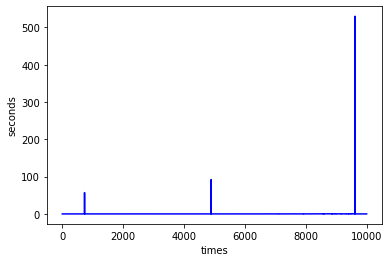

In [112]:
#每千次
plt.xlabel("times")
plt.ylabel("seconds")
plt.plot(tPartDuration,'b') #Treap

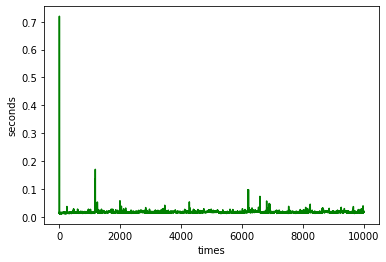

In [113]:
plt.xlabel("times")
plt.ylabel("seconds")
plt.plot(sPartDuration,'g') #Skiplist

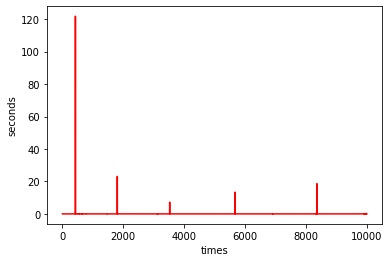

In [114]:
plt.xlabel("times")
plt.ylabel("seconds")
plt.plot(rbPartDuration,'r') #Red black tree

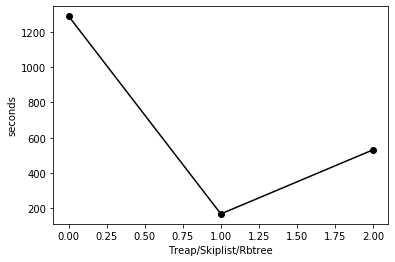

In [115]:
#總長度
plt.xlabel("Treap/Skiplist/Rbtree")
plt.ylabel("seconds")
plt.plot(insertTime,'ko-')

# 搜尋時間

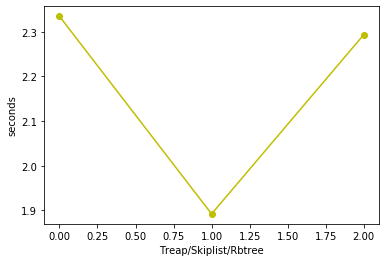

In [116]:
plt.xlabel("Treap/Skiplist/Rbtree")
plt.ylabel("seconds")
plt.plot(searchTime,'yo-')